# Reading in Superconductivity Dataset(train.csv) into pandas DataFrame

### Original dataset: train_data
- No missing values in dataset
- No encoding as all the features are of int/float and are continuous

#### Target (Attribute we want to predict):
- critical_temp

In [1]:
import pandas as pd
import seaborn as sns

# read_csv reads a csv file(train.csv) into a DataFrame(train_data)
train_data = pd.read_csv("train.csv")

"""
    info() prints a summary of a DataFrame(train_data)
    train_data has NO missing values in all its features
"""
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

-------------------------------------------------------------------------------------------------------------------------------

# Analysing Correlation
- 0: NO correlation
- 1: Strong positive correlation
- -1: Strong negative correlation

We select features which have an absolute correlation coefficient of more than 0.6 with respect to critical temperature

In [2]:
corr_matrix = train_data.corr()

# Get a correlation on the values with respect to "critical_temp"
a = abs(corr_matrix["critical_temp"])

# Features with > 0.6 (abs) correlation ONLY
result = a[a > 0.6]

result

number_of_elements             0.601069
wtd_entropy_atomic_mass        0.626930
range_fie                      0.600790
wtd_entropy_atomic_radius      0.603494
range_atomic_radius            0.653759
range_ThermalConductivity      0.687654
std_ThermalConductivity        0.653632
wtd_std_ThermalConductivity    0.721271
mean_Valence                   0.600085
wtd_mean_Valence               0.632401
wtd_gmean_Valence              0.615653
critical_temp                  1.000000
Name: critical_temp, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

# Correlation Visualisation
Scatter matrix & heatmap to observe the relation between features

In [3]:
# Visualisation based on correlation
import matplotlib.pyplot as plt

# Features with > 0.6 (abs) correlation ONLY
attributes = ["number_of_elements",
              "wtd_entropy_atomic_mass",
              "range_fie", "wtd_entropy_atomic_radius",
              "range_atomic_radius",
              "range_ThermalConductivity",
              "std_ThermalConductivity",
              "wtd_std_ThermalConductivity",
              "mean_Valence", "wtd_mean_Valence",
              "wtd_gmean_Valence", "critical_temp"]

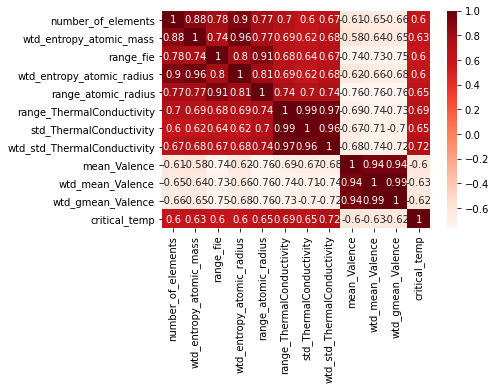

In [4]:
sns.heatmap(train_data[attributes].corr(),
            cmap = 'Reds', annot = True)

plt.show()

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data[attributes], alpha = 0.5, figsize = (50, 50))

array([[<AxesSubplot:xlabel='number_of_elements', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='wtd_entropy_atomic_mass', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='range_fie', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='wtd_entropy_atomic_radius', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='range_atomic_radius', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='range_ThermalConductivity', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='std_ThermalConductivity', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='wtd_std_ThermalConductivity', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='mean_Valence', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='wtd_mean_Valence', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='wtd_gmean_Valence', ylabel='number_of_elements'>,
        <AxesSubplot:xlabel='critical_temp', ylabel='number_of_elements'>],
       [<AxesSubplot:xlabel=

# Feature Selection
Select the features that have the highest correlation with the target variable

In [6]:
# Filter the features
train_data = train_data[attributes]

train_data

number_of_elements  wtd_entropy_atomic_mass  range_fie  \
0                       4                 1.062396      810.6   
1                       5                 1.057755      810.6   
2                       4                 0.975980      810.6   
3                       4                 1.022291      810.6   
4                       4                 1.129224      810.6   
...                   ...                      ...        ...   
21258                   4                 1.254119      273.0   
21259                   5                 1.571630      810.6   
21260                   2                 0.530198      139.9   
21261                   2                 0.640883      139.9   
21262                   3                 0.895229      181.3   

       wtd_entropy_atomic_radius  range_atomic_radius  \
0                       1.207040                  205   
1                       1.204115                  205   
2                       1.132547                  205   
3                       1.173033                  205   
4                       1.261194                  205   
...                          ...                  ...   
21258                   1.112222                  111   
21259                   1.536691                  205   
21260                   0.465055                   29   
21261                   0.590271                   29   
21262                   0.883461                   53   

       range_ThermalConductivity  std_ThermalConductivity  \
0                      399.97342               168.854244   
1                      429.97342               198.554600   
2                      399.97342               168.854244   
3                      399.97342               168.854244   
4                      399.97342               168.854244   
...                          ...                      ...   
21258                  134.00000                55.056789   
21259                  399.97342               151.164639   
21260                   17.00000                 8.500000   
21261                   17.00000                 8.500000   
21262                   78.48000                36.425359   

       wtd_std_ThermalConductivity  mean_Valence  wtd_mean_Valence  \
0                       138.517163          2.25          2.257143   
1                       139.630922          2.00          2.257143   
2                       138.540613          2.25          2.271429   
3                       138.528893          2.25          2.264286   
4                       138.493671          2.25          2.242857   
...                            ...           ...               ...   
21258                    46.595943          3.25          3.555556   
21259                   156.558695          2.20          2.047619   
21260                     6.800000          4.50          4.800000   
21261                     7.862385          4.50          4.690000   
21262                    38.254432          5.00          4.500000   

       wtd_gmean_Valence  critical_temp  
0               2.219783          29.00  
1               2.210679          26.00  
2               2.232679          19.00  
3               2.226222          22.00  
4               2.206963          23.00  
...                  ...            ...  
21258           3.519911           2.44  
21259           2.038991         122.10  
21260           4.781762           1.98  
21261           4.665819           1.84  
21262           4.242641          12.80  

[21263 rows x 12 columns]

-------------------------------------------------------------------------------------------------------------------------------

# Stratified Sampling based on critical temperature attribute
- Training: 2/3 records
- Testing: 1/3 records

### Parameters (StratifiedShuffleSplit):
- n_splits: No. of re-shuffling & splitting iterations (Default: 10)
- test_size: What % of data to use for TESTING dataset
- train_size: What % of data to use for TRAINING dataset
- random_state: Seed for the random splitting of the data

### Stratified sampling process:
1) Represent the continuous variable (critical_temp) as categorical by assigning 'classes' to each value that will represent a bucket/range it corresponds to (Binning process)
2) Add the categorised data as an attribute, "critical_temp_bins" to the original dataset
2) Instantiate StratifiedShuffleSplit object and call split method to do stratified sampling based on the "critical_temp_bins" attribute

In [7]:
import numpy as np

tempLabels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_data["critical_temp_bins"] = pd.qcut(train_data["critical_temp"],
                                           q = 10, precision = 1,
                                          labels = tempLabels)

# value_counts returns object containing counts of unique values
# sort_index sorts by label (default = 0 = index/row)
train_data["critical_temp_bins"].value_counts().sort_index()

1     2144
2     2113
3     2122
4     2166
5     2171
6     2051
7     2117
8     2130
9     2139
10    2110
Name: critical_temp_bins, dtype: int64

In [8]:
# See the range of each bin
print(pd.qcut(train_data["critical_temp"],
               q = 10, precision = 1))

0          (20.0, 31.5]
1          (20.0, 31.5]
2          (12.0, 20.0]
3          (20.0, 31.5]
4          (20.0, 31.5]
              ...      
21258        (2.0, 4.0]
21259     (89.0, 185.0]
21260    (-0.0998, 2.0]
21261    (-0.0998, 2.0]
21262      (12.0, 20.0]
Name: critical_temp, Length: 21263, dtype: category
Categories (10, interval[float64]): [(-0.0998, 2.0] < (2.0, 4.0] < (4.0, 7.0] < (7.0, 12.0] ... (31.5, 49.9] < (49.9, 74.0] < (74.0, 89.0] < (89.0, 185.0]]


## Bin Ranges

<table style = "width:90%">
    <tr> <th> Bin </th> <th> Range </th> </tr>
    <tr> <td> 1 </td> <td> (-0.0998, 2.0] </td> </tr>
    <tr> <td> 2 </td> <td> (2.0, 4.0] </td> </tr>
    <tr> <td> 3 </td> <td> (4.0, 7.0] </td> </tr>
    <tr> <td> 4 </td> <td> (7.0, 12.0] </td> </tr>
    <tr> <td> 5 </td> <td> (12.0, 20.0] </td> </tr>
    <tr> <td> 6 </td> <td> (20.0, 31.5] </td> </tr>
    <tr> <td> 7 </td> <td> (31.5, 49.9] </td> </tr>
    <tr> <td> 8 </td> <td> (49.9, 74.0] </td> </tr>
    <tr> <td> 9 </td> <td> (74.0, 89.0] </td> </tr>
    <tr> <td> 10 </td> <td> (89.0, 185.0] </td> </tr>
<table>

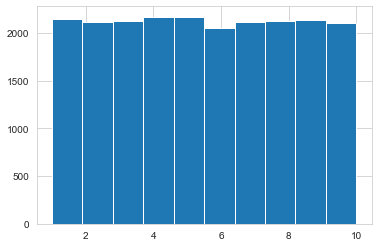

In [9]:
import matplotlib.pyplot as plt

# whitegrid to see the white lines between the bars
sns.set_style('whitegrid')

plt.hist(train_data['critical_temp_bins'], bins = 10)
plt.show()

In [10]:
# critical_temp_bins added to ORIGINAL dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   number_of_elements           21263 non-null  int64   
 1   wtd_entropy_atomic_mass      21263 non-null  float64 
 2   range_fie                    21263 non-null  float64 
 3   wtd_entropy_atomic_radius    21263 non-null  float64 
 4   range_atomic_radius          21263 non-null  int64   
 5   range_ThermalConductivity    21263 non-null  float64 
 6   std_ThermalConductivity      21263 non-null  float64 
 7   wtd_std_ThermalConductivity  21263 non-null  float64 
 8   mean_Valence                 21263 non-null  float64 
 9   wtd_mean_Valence             21263 non-null  float64 
 10  wtd_gmean_Valence            21263 non-null  float64 
 11  critical_temp                21263 non-null  float64 
 12  critical_temp_bins           21263 non-null  category
dtypes

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits = 1 -> splits into 2 datasets
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 1/3, random_state = 42)

# split() function returns indexes for train & test samples
for train_index, test_index in sss.split(train_data,
                                         train_data["critical_temp_bins"]):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]

# Comparing distribution of data in original dataset, training set, and testing set wrt. critical temperature
print("Original dataset distribution:")
plt.hist(train_data['critical_temp'])
plt.show()

print("Training dataset distribution:")
plt.hist(strat_train_set['critical_temp'])
plt.show()

print("Testing dataset distribution:")
plt.hist(strat_test_set['critical_temp'])
plt.show()

print("TRAIN:", train_index, "\nTEST:", test_index)

Original dataset distribution:


Training dataset distribution:


Testing dataset distribution:


TRAIN: [12820 13520  2819 ...  3192 13324 15250] 
TEST: [18958 18144 16111 ... 21113 18016  8683]


In [12]:
# Checking (approx.) training = 2/3 + testing = 1/3
print("No. of records in train set:", len(strat_train_set))
print("No. of records in test set:", len(strat_test_set))

No. of records in train set: 14175
No. of records in test set: 7088


-------------------------------------------------------------------------------------------------------------------------------

# Data Cleaning and Feature Scaling
- Remove the target column we're trying to predict (critical_temp) from the TRAINING dataset and TESTING dataset
- As attributes in the dataset do not have null values, handling of missing features not required
- As attributes in the dataset are all continuous, handling of categorical features not required
- Perform feature scaling to normalise the range of independent variables

### Prepare the labels for training set

In [13]:
# Drop labels for training set (w/o critical_temp)
train_data = strat_train_set.drop("critical_temp", axis = 1)

# Gets the labels for the TRAINING dataset (just critical_temp)
train_data_labels = strat_train_set["critical_temp"].copy()

# train_data_labels
train_data_labels

12820     1.830
13520     4.300
2819     87.000
3403     91.500
6282      5.400
          ...  
7121     90.815
3425     80.000
3192     40.800
13324     8.000
15250     7.250
Name: critical_temp, Length: 14175, dtype: float64

### Prepare the features for training set

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiate a pipeline with StandardScaler class to standardise input dataset
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# fit_transform() to call the pipeline on train_data to make it ML-ready
train_data_prepared = num_pipeline.fit_transform(train_data)

train_data_prepared

array([[-1.46931467, -1.43478523, -1.39363547, ...,  2.13149974,
         1.91257971, -1.5634429 ],
       [-0.77436854, -0.61213105, -0.34397008, ...,  1.39409006,
         1.37086416, -0.86730798],
       [ 1.31046984,  0.73161919,  0.76826031, ..., -0.89379693,
        -0.83850172,  1.22109676],
       ...,
       [-0.07942241,  0.4015527 ,  0.64313034, ..., -0.94674293,
        -0.88110981,  0.52496185],
       [-1.46931467, -1.77074591, -0.49114367, ...,  1.14533504,
         1.2217202 , -0.51924053],
       [-1.46931467, -1.87913658, -1.51552374, ...,  1.61024126,
         1.71373188, -0.51924053]])

### Prepare the labels for testing set

In [15]:
# Drop labels for testing set (w/o critical_temp)
test_data = strat_test_set.drop("critical_temp", axis = 1)

# Gets the labels for the TESTING dataset (just critical_temp)
test_data_labels = strat_test_set["critical_temp"].copy()

# test_data_labels
test_data_labels

18958    22.40
18144    26.00
16111     6.09
17325     9.38
7781     94.00
         ...  
19025    64.95
4157     93.10
21113     6.86
18016     4.56
8683     30.00
Name: critical_temp, Length: 7088, dtype: float64

### Prepare the features for testing set

In [16]:
# fit_transform() to call the pipeline on test_data to make it ML-ready
test_data_prepared = num_pipeline.fit_transform(test_data)

test_data_prepared

array([[-0.77583915, -0.02518725, -0.69894263, ...,  0.91717838,
         0.80270867,  0.17694919],
       [-0.08132691,  0.28178354, -0.13389501, ...,  0.31532458,
         0.17245922,  0.17694919],
       [-1.47035139, -2.0539432 , -1.76425943, ...,  1.4004238 ,
         1.46972329, -0.86736042],
       ...,
       [-1.47035139, -1.01222106, -1.06452395, ...,  2.01338061,
         2.10189792, -0.86736042],
       [ 0.61318533,  0.71787618,  0.64953935, ...,  0.14448358,
         0.06311739, -0.86736042],
       [ 0.61318533, -0.1895175 ,  0.64953935, ..., -0.74965829,
        -0.70969655,  0.17694919]])

-------------------------------------------------------------------------------------------------------------------------------

# 3 Regression Models
1. SGD Regressor
2. Random Forest
3. Neural Network MLP Regressor

### Evaluation methods used:
1. K-folder cross-validation
2. Evaluation on unseen test data

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Method to display cross-validation scores, mean and standard deviation
def display_cv_scores(scores):
    print("Scores:", scores)
    print("Mean: %.4f" % scores.mean())
    print("Standard Deviation: %.4f" % scores.std())

# Method to display model evaluation metrics
def display_model_metrics(label, predictions):
    # The mean absolute error
    print("Mean absolute error: %.4f\n" % mean_absolute_error(label, predictions))

    # The mean squared error
    print("Root mean squared error: %.4f\n" % np.sqrt(mean_squared_error(label, predictions)))

    # The coefficient of determination: 1 is perfect prediction R^2
    print("Coefficient of determination: %.4f\n" % r2_score(label, predictions))

-------------------------------------------------------------------------------------------------------------------------------

## SGD Regressor
- SGD: Stochastic Gradient Descent

In [18]:
from sklearn.linear_model import SGDRegressor

# Create the SGD Regressor model
sgd_reg = SGDRegressor(loss='squared_loss', penalty='l2', alpha=1e-5, random_state=42)

# fit() to train the model/algorithm
sgd_reg.fit(train_data_prepared, train_data_labels)


SGDRegressor(alpha=1e-05, random_state=42)

### Evaluation with K-folder Cross-Validation (Training Data)

In [19]:
# Evaluate with 10-folder cross-validation
sgd_scores = cross_val_score(sgd_reg, train_data_prepared, train_data_labels,
                             scoring = "neg_mean_squared_error", cv = 10)

# Calculate RMSE across all 10 iterations
sgd_rmse_scores = np.sqrt(-sgd_scores)

# Display scores
display_cv_scores(sgd_rmse_scores)

Scores: [11.82218504 11.85814437 11.87527703 11.85788811 12.33606229 11.96855762
 12.1464023  12.00604872 11.9064899  11.76242574]
Mean: 11.9539
Standard Deviation: 0.1634


### Evaluation on unseen test data

In [20]:
# Predicting
sgd_final_predictions = sgd_reg.predict(test_data_prepared)

# Display final predictions
print("Final predictions:")
print(sgd_final_predictions)

# Display evaluation metrics
display_model_metrics(test_data_labels, sgd_final_predictions)

Final predictions:
[40.54567927 35.99186646  7.37692415 ...  7.08623381  1.85493961
 39.05155951]
Mean absolute error: 9.9732

Root mean squared error: 12.1131

Coefficient of determination: 0.8760



### Plotting actual values against predicted values

Actual_Values  Predicted_Values
0          22.40         40.545679
1          26.00         35.991866
2           6.09          7.376924
3           9.38         15.556379
4          94.00         84.667997
5          78.00         74.921908
6          26.50         41.909300
7          24.60         38.101644
8           2.60         -2.458550
9           1.90        -15.727473

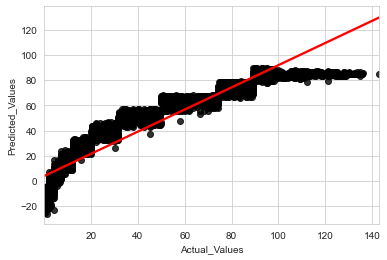

In [21]:
# Create DataFrame with columns actual values and predicted values
sgd_error = pd.DataFrame({'Actual_Values': np.array(test_data_labels),
                          'Predicted_Values': sgd_final_predictions})

# Display first 10 rows
display(sgd_error.head(10))

# Plot regression line graph
sns.regplot(x = "Actual_Values", y = "Predicted_Values",
            data = sgd_error, scatter_kws = {"color": "black"},
            line_kws = {"color": "red"})

plt.show()

-------------------------------------------------------------------------------------------------------------------------------

## Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
forest_reg = RandomForestRegressor(random_state=42)

# fit() to train the model/algorithm
forest_reg.fit(train_data_prepared, train_data_labels)

RandomForestRegressor(random_state=42)

### Evaluation with K-folder Cross-Validation (Training Data)

In [23]:
# Evaluate with 10-folder cross-validation
forest_scores = cross_val_score(forest_reg, train_data_prepared, train_data_labels,
                             scoring = "neg_mean_squared_error", cv = 10)

# Calculate RMSE across all 10 iterations
forest_rmse_scores = np.sqrt(-forest_scores)

# Display scores
display_cv_scores(forest_rmse_scores)

Scores: [3.6644172  3.67962876 3.54495353 3.81574738 3.84275733 3.91972504
 3.49217877 3.84400266 4.1663233  3.55676927]
Mean: 3.7527
Standard Deviation: 0.1954


### Evaluation on unseen test data

In [24]:
# Predicting
forest_final_predictions = forest_reg.predict(test_data_prepared)

# Display final predictions
print("Final predictions:")
print(forest_final_predictions)

# Display evaluation metrics
display_model_metrics(test_data_labels, forest_final_predictions)

Final predictions:
[23.98898333 28.13405714  5.91385167 ...  5.04413     5.52546667
 28.80607619]
Mean absolute error: 2.3451

Root mean squared error: 3.8408

Coefficient of determination: 0.9875



### Plotting actual values against predicted values

In [25]:
# Create DataFrame with columns actual values and predicted values
forest_error = pd.DataFrame({'Actual_Values': np.array(test_data_labels),
                             'Predicted_Values': forest_final_predictions})

# Display first 10 rows
display(forest_error.head(10))

# Plot regression line graph
sns.regplot(x = "Actual_Values", y = "Predicted_Values",
            data = forest_error, scatter_kws = {"color": "black"},
            line_kws = {"color": "red"})

plt.show()

Actual_Values  Predicted_Values
0          22.40         23.988983
1          26.00         28.134057
2           6.09          5.913852
3           9.38          9.726050
4          94.00        124.742528
5          78.00         82.698500
6          26.50         26.105000
7          24.60         23.290500
8           2.60          3.074030
9           1.90          1.616717

-------------------------------------------------------------------------------------------------------------------------------

## Neural Network MLP Regressor
- MLP: Multi-layer Perceptron regressor

In [44]:
from sklearn.neural_network import MLPRegressor

# Create the Random Forest model
mlp_reg = MLPRegressor(solver = 'adam', alpha = 1e-5, learning_rate_init= 0.01,
                   random_state = 24, max_iter = 500, early_stopping = True)

# fit() to train the model/algorithm
mlp_reg.fit(train_data_prepared, train_data_labels)

MLPRegressor(alpha=1e-05, early_stopping=True, learning_rate_init=0.01,
             max_iter=500, random_state=24)

### Evaluation with Cross-Validation (Training Data)

In [45]:
neural_scores = cross_val_score(mlp_reg, train_data_prepared,
                                train_data_labels,
                                scoring = "neg_mean_squared_error", cv = 10)

neural_rmse_scores = np.sqrt(-neural_scores)

display_cv_scores(neural_rmse_scores)

Scores: [4.20456552 4.62492013 4.57899858 4.79065512 4.76777661 4.55251554
 4.61691792 4.88514683 5.5753398  4.63318774]
Mean: 4.7230
Standard Deviation: 0.3327


### Evaluation on unseen test data

In [46]:
# Predicting
mlp_final_predictions = mlp_reg.predict(test_data_prepared)

# Display final predictions
print("Final predictions:")
print(mlp_final_predictions)

# Display evaluation metrics
display_model_metrics(test_data_labels, mlp_final_predictions)

Final predictions:
[24.43355078 26.10484603  5.10391723 ...  5.01391362  6.25226891
 25.7564367 ]
Mean absolute error: 3.0229

Root mean squared error: 4.7032

Coefficient of determination: 0.9813



### Plotting actual values against predicted values

Actual_Values  Predicted_Values
0          22.40         24.433551
1          26.00         26.104846
2           6.09          5.103917
3           9.38         10.371560
4          94.00        109.827339
5          78.00         81.862746
6          26.50         27.249776
7          24.60         23.569926
8           2.60          2.228174
9           1.90          0.948652

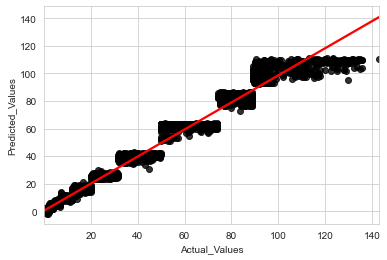

In [51]:
# Create DataFrame with columns actual values and predicted values
mlp_error = pd.DataFrame({'Actual_Values': np.array(test_data_labels),
                             'Predicted_Values': mlp_final_predictions})

# Display first 10 rows
display(mlp_error.head(10))

# Plot regression line graph
sns.regplot(x = "Actual_Values", y = "Predicted_Values",
            data = mlp_error, scatter_kws = {"color": "black"},
            line_kws = {"color": "red"})

plt.show()

-------------------------------------------------------------------------------------------------------------------------------

# Fine-tuning the models using hyperparameter optimization
- Use of a parameter grid to specify hyperparameters and their ranges 
- Use of Grid Search Cross Validation to exhaust all possible combinations of hyperparameters in order to find the best combination

## Fine-tuning SGD Regressor
### Hyperparameters to tune:
- learning_rate (Learning rate schedule)
- penalty (Regularization term used)
- alpha (Strength of regularization)

In [30]:
from sklearn.model_selection import GridSearchCV

# Create parameter grid
param_grid = [
    {'learning_rate': ['constant', 'invscaling', 'adaptive'],
     'penalty': ['l2', 'l1', 'elasticnet'],
     'alpha': [1e-6, 1e-5, 1e-4, 1e-3]}
]

# Run grid search on SGDRegressor
sgd_reg = SGDRegressor(random_state=42, max_iter=1000)
grid_search = GridSearchCV(sgd_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(train_data_prepared, train_data_labels)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001],
                          'learning_rate': ['constant', 'invscaling',
                                            'adaptive'],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
# Display best parameters and the best mean RMSE score from cross-validation
sgd_tuned_best_params = grid_search.best_params_
sgd_tuned_best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters: ", sgd_tuned_best_params)
print("Root mean squared error: %.4f\n" % sgd_tuned_best_score)


Best Parameters:  {'alpha': 0.0001, 'learning_rate': 'adaptive', 'penalty': 'l2'}
Root mean squared error: 11.9425



### Final Evaluation on test data using best parameters
- When using the best combination of hyperparameters, the model performed better as seen by the lower mean absolute error and root mean squared error as well as the higher coefficient of determination (r-squared)

In [32]:
# Predicting
sgd_final_model = grid_search.best_estimator_
sgd_tuned_final_predictions = sgd_final_model.predict(test_data_prepared)

# Display evaluation metrics before fine-tuning
print("Before fine-tuning:")
display_model_metrics(test_data_labels, sgd_final_predictions)

# Display evaluation metrics after fine-tuning
print("After fine-tuning:")
display_model_metrics(test_data_labels, sgd_tuned_final_predictions)

Before fine-tuning:
Mean absolute error: 9.9732

Root mean squared error: 12.1131

Coefficient of determination: 0.8760

After fine-tuning:
Mean absolute error: 9.9688

Root mean squared error: 12.0909

Coefficient of determination: 0.8764



-------------------------------------------------------------------------------------------------------------------------------

## Fine-tuning Random Forest Regression
### Hyperparameters to tune:
- n_estimators (Number of trees in the forest)
- max_features (Number of features to consider when looking for the best split)
- bootstrap (Whether bootstrap sampling is used at each split)

In [33]:
# Create parameter grid
param_grid = [
    {'n_estimators': [3, 10, 30, 100],
     'max_features': [1.0, 2, 4, 6, 8]},
    {'bootstrap': [False],
     'n_estimators': [3, 10, 30, 100],
     'max_features': [2, 3, 4]}
]

# Run grid search on random forest regressor
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(train_data_prepared, train_data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [1.0, 2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
# Display best parameters and the best mean RMSE score from cross-validation
forest_tuned_best_params = grid_search.best_params_
forest_tuned_best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters: ", forest_tuned_best_params)
print("Root mean squared error: %.4f\n" % forest_tuned_best_score)


Best Parameters:  {'max_features': 1.0, 'n_estimators': 100}
Root mean squared error: 3.8042



### Final Evaluation on test data using best parameters
- Since the best parameters were already selected before fine-tuning, the model's performance is the same before and after fine-tuning

In [35]:
# Predicting
forest_final_model = grid_search.best_estimator_
forest_tuned_final_predictions = forest_final_model.predict(test_data_prepared)

# Display evaluation metrics before fine-tuning
print("Before fine-tuning:")
display_model_metrics(test_data_labels, forest_final_predictions)

# Display evaluation metrics after fine-tuning
print("After fine-tuning:")
display_model_metrics(test_data_labels, forest_tuned_final_predictions)

Before fine-tuning:
Mean absolute error: 2.3451

Root mean squared error: 3.8408

Coefficient of determination: 0.9875

After fine-tuning:
Mean absolute error: 2.3451

Root mean squared error: 3.8408

Coefficient of determination: 0.9875



-------------------------------------------------------------------------------------------------------------------------------

## Fine-tuning Neural Network MLP Regressor
### Hyperparameters to tune:
- learning_rate_init (Initial learning rate)
- alpha (Strength of regularization)

In [41]:
from sklearn.model_selection import GridSearchCV

# Create parameter grid
param_grid = [
    {'learning_rate_init': [1e-3, 5e-3, 1e-2],
     'alpha': [1e-5, 1e-4, 1e-3, 1e-2]}
]

# Run grid search on MLP regressor
mlp_reg = MLPRegressor(solver='adam', random_state=24, max_iter=1000, early_stopping=True)
grid_search = GridSearchCV(mlp_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(train_data_prepared, train_data_labels)

GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    random_state=24),
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01],
                          'learning_rate_init': [0.001, 0.005, 0.01]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
# Display best parameters and the best mean RMSE score from cross-validation
mlp_tuned_best_params = grid_search.best_params_
mlp_tuned_best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters: ", mlp_tuned_best_params)
print("Root mean squared error: %.4f\n" % mlp_tuned_best_score)


Best Parameters:  {'alpha': 1e-05, 'learning_rate_init': 0.01}
Root mean squared error: 4.8846



### Final Evaluation on test data using best parameters
- When using the best combination of hyperparameters, the model performed better as seen by the slightly lower mean absolute error and root mean squared error as well as the slightly higher coefficient of determination (r-squared)

In [49]:
# Predicting
mlp_final_model = grid_search.best_estimator_
mlp_tuned_final_predictions = mlp_final_model.predict(test_data_prepared)

# Display evaluation metrics before fine-tuning
print("Before fine-tuning:")
display_model_metrics(test_data_labels, mlp_final_predictions)

# Display evaluation metrics after fine-tuning
print("After fine-tuning:")
display_model_metrics(test_data_labels, mlp_tuned_final_predictions)

Before fine-tuning:
Mean absolute error: 3.0229

Root mean squared error: 4.7032

Coefficient of determination: 0.9813

After fine-tuning:
Mean absolute error: 3.0229

Root mean squared error: 4.7032

Coefficient of determination: 0.9813



-------------------------------------------------------------------------------------------------------------------------------

## Comparison in the performance of all 3 models
- The random forest regression model has the best performance, followed by the MLP Regression model and lastly, the SGD Regression model

In [50]:
# Display final evaluation metrics for SGD Regressor
print("SGD Regressor final metrics:")
display_model_metrics(test_data_labels, sgd_tuned_final_predictions)

# Display final evaluation metrics for Random Forest Regression
print("Random Forest Regression final metrics:")
display_model_metrics(test_data_labels, forest_tuned_final_predictions)

# Display final evaluation metrics for MLP Regressor
print("MLP Regressor final metrics:")
display_model_metrics(test_data_labels, mlp_tuned_final_predictions)

SGD Regressor final metrics:
Mean absolute error: 9.9688

Root mean squared error: 12.0909

Coefficient of determination: 0.8764

Random Forest Regression final metrics:
Mean absolute error: 2.3451

Root mean squared error: 3.8408

Coefficient of determination: 0.9875

MLP Regressor final metrics:
Mean absolute error: 3.0229

Root mean squared error: 4.7032

Coefficient of determination: 0.9813

